<a href="https://colab.research.google.com/github/Souhib-khalbous/Drug-Response-Prediction/blob/main/DRP_Getting_Labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Response Prediction (DRP) Project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **// This is a TEST Notebook//**

In [ ]:
import pandas as pd

# Reading the datasets
sanger_df = pd.read_csv('/content/drive/MyDrive/Drug Response Prediction (DRP) Project/DRP Project/Datasets/Drug Response Datasets/sanger-dose-response.csv')
gdsc1_df = pd.read_csv('/content/drive/MyDrive/Drug Response Prediction (DRP) Project/DRP Project/Datasets/Drug Response Datasets/GDSC (Sanger)/Drug_sensitivity_IC50_(Sanger_GDSC1)_subsetted.csv')
gdsc2_df = pd.read_csv('/content/drive/MyDrive/Drug Response Prediction (DRP) Project/DRP Project/Datasets/Drug Response Datasets/GDSC (Sanger)/Drug_sensitivity_IC50_(Sanger_GDSC2)_subsetted.csv')
prism_df = pd.read_csv('/content/drive/MyDrive/Drug Response Prediction (DRP) Project/DRP Project/Datasets/Drug Response Datasets/Repurposing (Braod)/PRISM_Repurposing_Public_24Q2_subsetted.csv')

# Display the first few rows and datatypes of each dataset
sanger_df_info = sanger_df.info()
gdsc1_df_info = gdsc1_df.info()
gdsc2_df_info = gdsc2_df.info()
prism_df_info = prism_df.info()

sanger_df_head = sanger_df.head()
gdsc1_df_head = gdsc1_df.head()
gdsc2_df_head = gdsc2_df.head()
prism_df_head = prism_df.head()

sanger_df_info, sanger_df_head, gdsc1_df_info, gdsc1_df_head, gdsc2_df_info, gdsc2_df_head, prism_df_info, prism_df_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387626 entries, 0 to 387625
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DATASET            387626 non-null  object 
 1   COSMIC_ID          387626 non-null  int64  
 2   DRUG_ID            387626 non-null  int64  
 3   MIN_CONC           387626 non-null  float64
 4   MAX_CONC           387626 non-null  float64
 5   RMSE_PUBLISHED     387626 non-null  float64
 6   Z_SCORE_PUBLISHED  387626 non-null  float64
 7   IC50_PUBLISHED     387626 non-null  float64
 8   AUC_PUBLISHED      387626 non-null  float64
 9   ARXSPAN_ID         379005 non-null  object 
 10  DRUG_NAME          387552 non-null  object 
 11  BROAD_ID           295594 non-null  object 
 12  upper_limit        327340 non-null  float64
 13  ec50               327340 non-null  float64
 14  slope              327340 non-null  float64
 15  lower_limit        327340 non-null  float64
 16  au

(None,
   DATASET  COSMIC_ID  DRUG_ID  MIN_CONC  MAX_CONC  RMSE_PUBLISHED  \
 0   GDSC1     683665        1  0.007813       2.0        0.022518   
 1   GDSC1     684055        1  0.007813       2.0        0.031831   
 2   GDSC1     684057        1  0.007813       2.0        0.026047   
 3   GDSC1     684059        1  0.007813       2.0        0.110056   
 4   GDSC1     684062        1  0.007813       2.0        0.087010   
 
    Z_SCORE_PUBLISHED  IC50_PUBLISHED  AUC_PUBLISHED  ARXSPAN_ID  DRUG_NAME  \
 0          -0.192056       10.977393       0.982116  ACH-002270  ERLOTINIB   
 1           0.505823       23.133991       0.984820  ACH-002104  ERLOTINIB   
 2           1.280750       52.935278       0.985696  ACH-002106  ERLOTINIB   
 3           0.086028       14.774223       0.972701  ACH-002108  ERLOTINIB   
 4          -0.114395       11.926884       0.944463  ACH-002111  ERLOTINIB   
 
         BROAD_ID  upper_limit      ec50      slope  lower_limit       auc  \
 0  BRD-K70401845

In [ ]:
# Display column names to inspect if DRUG_NAME is present
sanger_columns = sanger_df.columns
gdsc1_columns = gdsc1_df.columns
gdsc2_columns = gdsc2_df.columns
prism_columns = prism_df.columns

sanger_columns, gdsc1_columns, gdsc2_columns, prism_columns


(Index(['DATASET', 'COSMIC_ID', 'DRUG_ID', 'MIN_CONC', 'MAX_CONC',
        'RMSE_PUBLISHED', 'Z_SCORE_PUBLISHED', 'IC50_PUBLISHED',
        'AUC_PUBLISHED', 'ARXSPAN_ID',
        ...
        'DRUG_NAME_Y-39983', 'DRUG_NAME_YK-4-279', 'DRUG_NAME_YM-155',
        'DRUG_NAME_YM-201636', 'DRUG_NAME_Z-LLNLE-CHO, Z-L-NORLEUCINE-CHO',
        'DRUG_NAME_ZG-10', 'DRUG_NAME_ZIBOTENTAN', 'DRUG_NAME_ZM-447439',
        'DRUG_NAME_ZOLEDRONATE, ZOLEDRONIC ACID, ZOMETA, RECLAST',
        'DRUG_NAME_ZSTK-474'],
       dtype='object', length=416),
 Index(['Unnamed: 0', 'ERLOTINIB (GDSC1:1)', 'AICA RIBONUCLEOTIDE (GDSC1:1001)',
        'VELBAN (GDSC1:1004)', 'CIS-DDP (GDSC1:1005)',
        'CYTARABINE (GDSC1:1006)', 'DOCETAXEL (GDSC1:1007)',
        'ABITREXATE (GDSC1:1008)', 'ATRA (GDSC1:1009)',
        'GEFITINIB (GDSC1:1010)',
        ...
        'BMS-509744 (GDSC1:63)', 'CMK (GDSC1:64)', 'CHLORIDINE (GDSC1:71)',
        'JW-7-52-1 (GDSC1:83)', 'A-443654 (GDSC1:86)', 'GW843682X (GDSC1:87)',
        

# Normalize

In [ ]:
# Handling missing values by imputing with mean values for numeric columns
sanger_df[sanger_numeric_cols] = sanger_df[sanger_numeric_cols].fillna(sanger_df[sanger_numeric_cols].mean())
gdsc1_df[gdsc1_numeric_cols] = gdsc1_df[gdsc1_numeric_cols].fillna(gdsc1_df[gdsc1_numeric_cols].mean())
gdsc2_df[gdsc2_numeric_cols] = gdsc2_df[gdsc2_numeric_cols].fillna(gdsc2_df[gdsc2_numeric_cols].mean())
prism_df[prism_numeric_cols] = prism_df[prism_numeric_cols].fillna(prism_df[prism_numeric_cols].mean())

# Feature selection: calculate correlation and variance
def select_top_features(df, top_n=10):
    numeric_df = df.select_dtypes(include=[np.number])
    correlation = numeric_df.corr().abs()
    variance = numeric_df.var()
    top_corr_features = correlation.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()[1:top_n+1].index.get_level_values(0).unique()
    top_var_features = variance.sort_values(ascending=False).index[:top_n].unique()
    top_features = list(set(top_corr_features).union(set(top_var_features)))
    return top_features

gdsc1_top_features = select_top_features(gdsc1_df)
gdsc2_top_features = select_top_features(gdsc2_df)
prism_top_features = select_top_features(prism_df)

gdsc1_selected_df = gdsc1_df[['COSMIC_ID'] + gdsc1_top_features.tolist()]
gdsc2_selected_df = gdsc2_df[['COSMIC_ID'] + gdsc2_top_features.tolist()]
prism_selected_df = prism_df[['COSMIC_ID'] + prism_top_features.tolist()]

# Display the selected top features datasets
gdsc1_selected_df.head(), gdsc2_selected_df.head(), prism_selected_df.head()


AttributeError: 'list' object has no attribute 'tolist'

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

In [ ]:
# Calculate variance for each column, ensuring only numeric columns are considered
sanger_variance = sanger_dose_response.select_dtypes(include=[float, int]).var()
gdsc1_variance = gdsc1.select_dtypes(include=[float, int]).var()
gdsc2_variance = gdsc2.select_dtypes(include=[float, int]).var()
prism_variance = prism.select_dtypes(include=[float, int]).var()

# Display the top columns by variance
print("Sanger Variance")
print(sanger_variance.sort_values(ascending=False).head(10))
print("\nGDSC1 Variance")
print(gdsc1_variance.sort_values(ascending=False).head(10))
print("\nGDSC2 Variance")
print(gdsc2_variance.sort_values(ascending=False).head(10))
print("\nPRISM Variance")
print(prism_variance.sort_values(ascending=False).head(10))


Sanger Variance
ec50                       inf
lower_limit       5.168452e+12
COSMIC_ID         4.566047e+10
upper_limit       4.931590e+07
R2                3.509593e+07
IC50_PUBLISHED    1.487217e+06
DRUG_ID           3.862967e+05
MAX_CONC          8.321150e+04
mse               1.281352e+02
slope             1.543090e+01
dtype: float64

GDSC1 Variance
GSK-1070916 (GDSC1:226)                                11.382453
NILOTINIB (GDSC1:1013)                                  9.960510
CFMS RECEPTOR TYROSINE KINASE INHIBITOR (GDSC1:193)     9.489078
AC 220 (GDSC1:254)                                      9.345768
RUXOLITINIB (GDSC1:206)                                 8.149287
LCL161 (GDSC1:439)                                      7.543949
LIMK1 INHIBITOR BMS4 (GDSC1:406)                        7.301342
ATRA (GDSC1:1009)                                       6.671478
VX 702 (GDSC1:1028)                                     6.304676
GSK 690693 (GDSC1:326)                                  6.

In [ ]:
# Calculate correlation with the target variable for numeric columns
target_variable = 'IC50_PUBLISHED'

# Filter numeric columns
sanger_numeric = sanger_dose_response.select_dtypes(include=[float, int])
gdsc1_numeric = gdsc1.select_dtypes(include=[float, int])
gdsc2_numeric = gdsc2.select_dtypes(include=[float, int])
prism_numeric = prism.select_dtypes(include=[float, int])

# Ensure target variable is in the numeric dataframe
if target_variable not in sanger_numeric.columns:
    sanger_numeric[target_variable] = sanger_dose_response[target_variable]

# Calculate correlation with the target variable
sanger_corr = sanger_numeric.corr()[target_variable].abs().sort_values(ascending=False)
gdsc1_corr = gdsc1_numeric.corr().abs().iloc[:, 0].sort_values(ascending=False)
gdsc2_corr = gdsc2_numeric.corr().abs().iloc[:, 0].sort_values(ascending=False)
prism_corr = prism_numeric.corr().abs().iloc[:, 0].sort_values(ascending=False)

# Display the top columns by correlation with the target variable
print("Sanger Correlation with Target")
print(sanger_corr.head(10))
print("\nGDSC1 Correlation")
print(gdsc1_corr.head(10))
print("\nGDSC2 Correlation")
print(gdsc2_corr.head(10))
print("\nPRISM Correlation")
print(prism_corr.head(10))


Sanger Correlation with Target
IC50_PUBLISHED       1.000000
MAX_CONC             0.343089
MIN_CONC             0.341847
log2.ic50            0.303410
Z_SCORE_PUBLISHED    0.130274
auc                  0.063087
AUC_PUBLISHED        0.060794
RMSE_PUBLISHED       0.052314
slope                0.023377
DRUG_ID              0.014653
Name: IC50_PUBLISHED, dtype: float64

GDSC1 Correlation
QL-VIII-58 (GDSC1:1166)           1.0
PARTHENOLIDE (GDSC1:89)           1.0
BIBF-1120 (GDSC1:380)             1.0
SNX 2112 (GDSC1:328)              1.0
AKT INHIBITOR VIII (GDSC1:228)    1.0
MK 0457 (GDSC1:32)                1.0
GX15-070 (GDSC1:182)              1.0
BLEOMYCIN (GDSC1:190)             1.0
PIPERLONGUMINE (GDSC1:1243)       1.0
THZ-2-49 (GDSC1:344)              1.0
Name: ERLOTINIB (GDSC1:1), dtype: float64

GDSC2 Correlation
BI-2536 (GDSC2:1086)             1.000000
(+)-CAMPTOTHECIN (GDSC2:1003)    1.000000
AZD-8055 (GDSC2:1059)            1.000000
EPZ015866 (GDSC2:2110)           1.000000
LCL1

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


Sanger Correlation with Target Variable


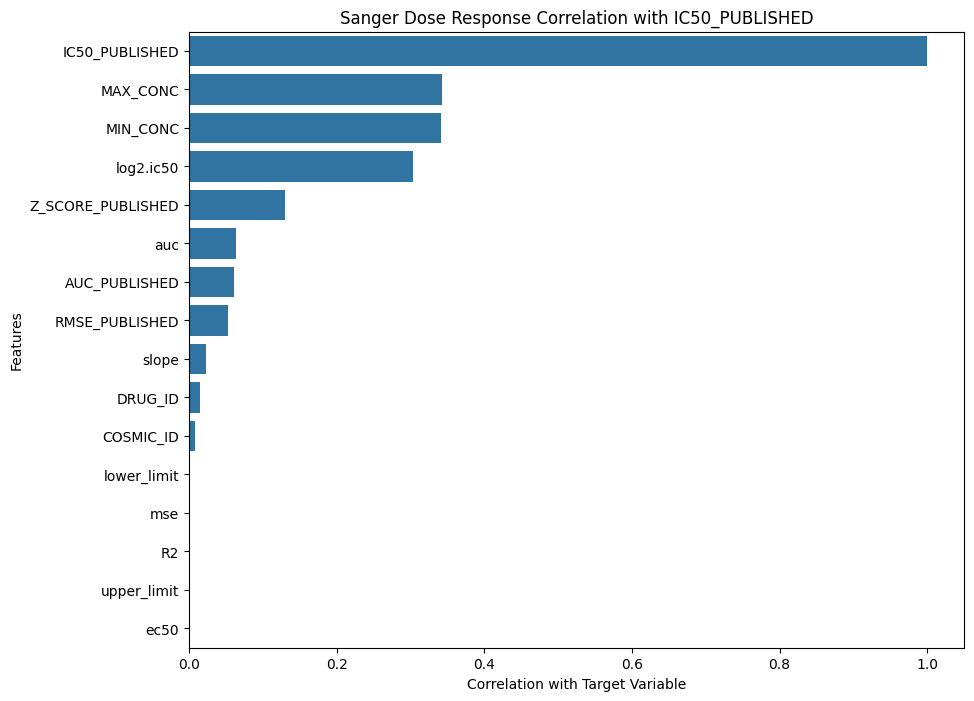

GDSC1 Correlation with Target Variable


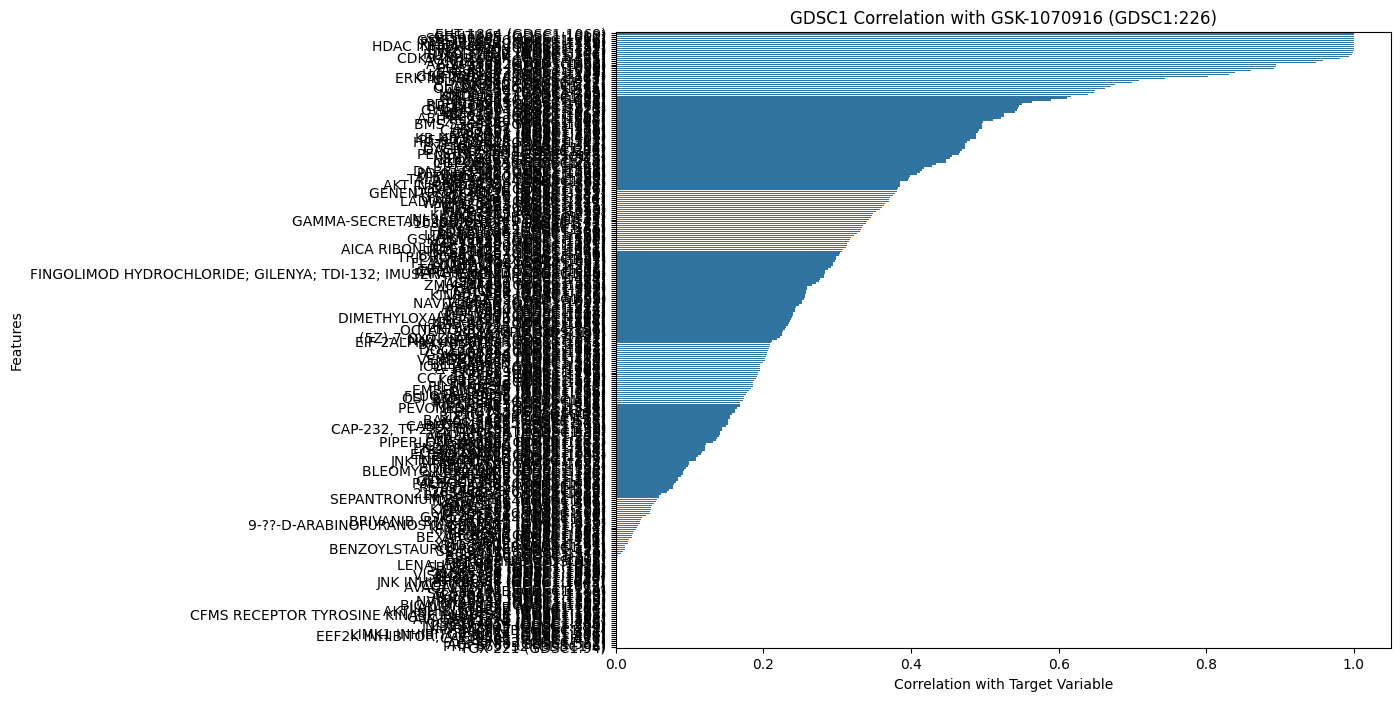

GDSC2 Correlation with Target Variable


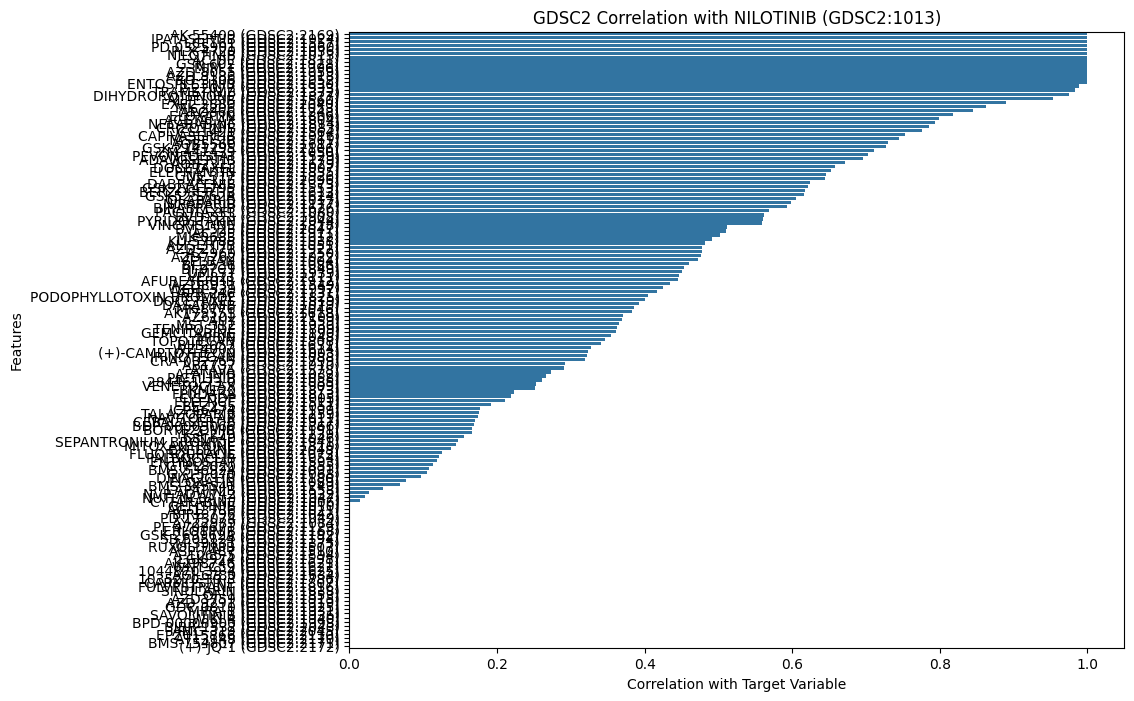

PRISM Correlation with Target Variable


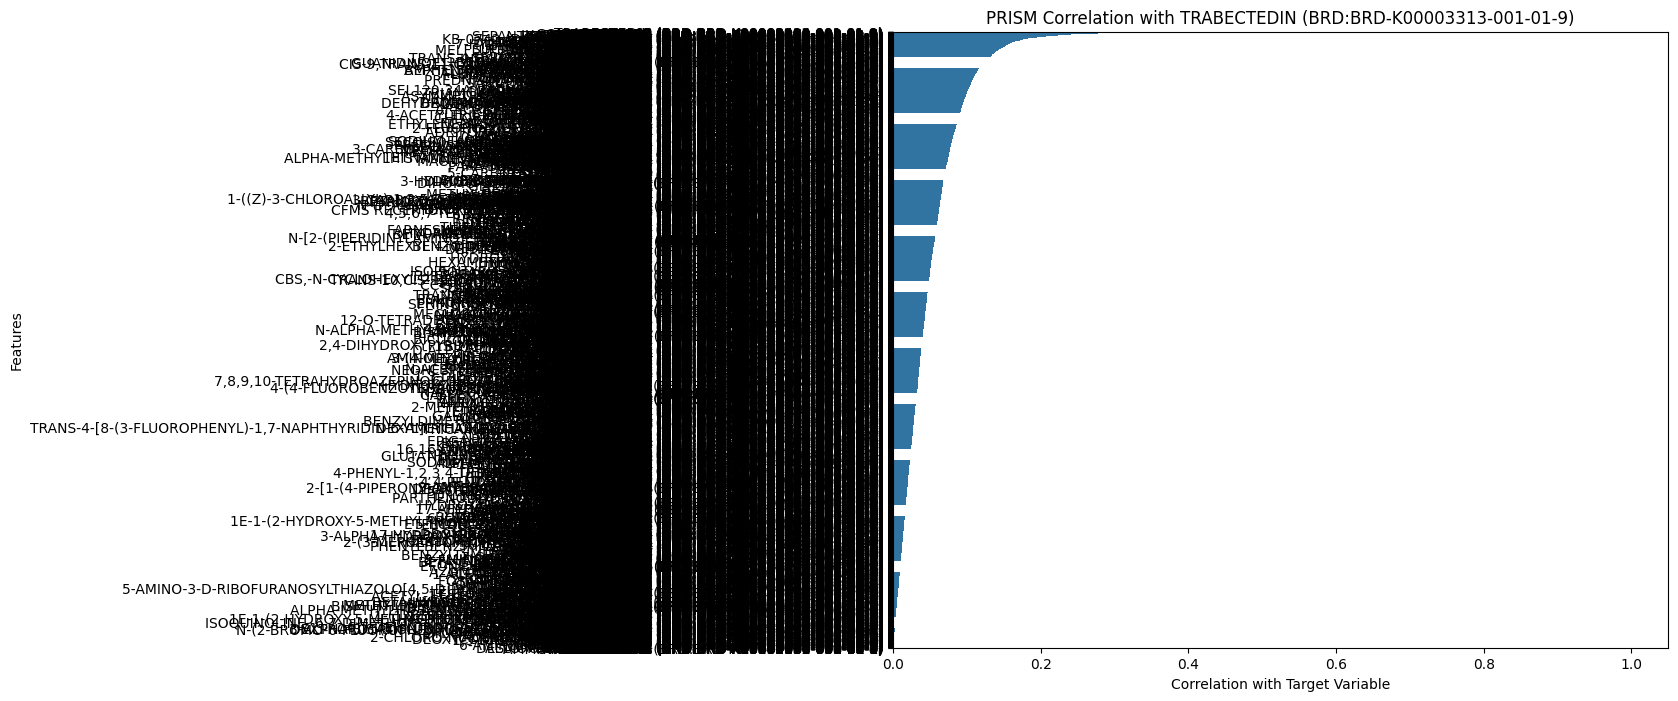

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot correlation bar plot for a series
def plot_correlation_barplot(correlation_series, title):
    plt.figure(figsize=(10, 8))
    sns.barplot(x=correlation_series.values, y=correlation_series.index)
    plt.title(title)
    plt.xlabel('Correlation with Target Variable')
    plt.ylabel('Features')
    plt.show()

# Ensure target variable is in the numeric dataframe for Sanger dataset
target_variable_sanger = 'IC50_PUBLISHED'
if target_variable_sanger not in sanger_numeric.columns:
    sanger_numeric[target_variable_sanger] = sanger_dose_response[target_variable_sanger]

# Select a high variance column as the target for GDSC1, GDSC2, and PRISM
target_variable_gdsc1 = gdsc1_variance.sort_values(ascending=False).index[0]
target_variable_gdsc2 = gdsc2_variance.sort_values(ascending=False).index[0]
target_variable_prism = prism_variance.sort_values(ascending=False).index[0]

# Calculate correlation with the target variable
sanger_corr = sanger_numeric.corr()[target_variable_sanger].abs().sort_values(ascending=False)
gdsc1_corr = gdsc1_numeric.corrwith(gdsc1[target_variable_gdsc1]).abs().sort_values(ascending=False)
gdsc2_corr = gdsc2_numeric.corrwith(gdsc2[target_variable_gdsc2]).abs().sort_values(ascending=False)
prism_corr = prism_numeric.corrwith(prism[target_variable_prism]).abs().sort_values(ascending=False)

# Plot correlation bar plots
print("Sanger Correlation with Target Variable")
plot_correlation_barplot(sanger_corr, f"Sanger Dose Response Correlation with {target_variable_sanger}")

print("GDSC1 Correlation with Target Variable")
plot_correlation_barplot(gdsc1_corr, f"GDSC1 Correlation with {target_variable_gdsc1}")

print("GDSC2 Correlation with Target Variable")
plot_correlation_barplot(gdsc2_corr, f"GDSC2 Correlation with {target_variable_gdsc2}")

print("PRISM Correlation with Target Variable")
plot_correlation_barplot(prism_corr, f"PRISM Correlation with {target_variable_prism}")


In [ ]:
# Check and rename column names if necessary
gdsc1.rename(columns={'Unnamed: 0': 'COSMIC_ID'}, inplace=True)
gdsc2.rename(columns={'Unnamed: 0': 'COSMIC_ID'}, inplace=True)
prism.rename(columns={'Unnamed: 0': 'COSMIC_ID'}, inplace=True)

# Display column names to verify
print("GDSC1 Columns:", gdsc1.columns)
print("GDSC2 Columns:", gdsc2.columns)
print("PRISM Columns:", prism.columns)


GDSC1 Columns: Index(['COSMIC_ID', 'ERLOTINIB (GDSC1:1)', 'AICA RIBONUCLEOTIDE (GDSC1:1001)',
       'VELBAN (GDSC1:1004)', 'CIS-DDP (GDSC1:1005)',
       'CYTARABINE (GDSC1:1006)', 'DOCETAXEL (GDSC1:1007)',
       'ABITREXATE (GDSC1:1008)', 'ATRA (GDSC1:1009)',
       'GEFITINIB (GDSC1:1010)',
       ...
       'BMS-509744 (GDSC1:63)', 'CMK (GDSC1:64)', 'CHLORIDINE (GDSC1:71)',
       'JW-7-52-1 (GDSC1:83)', 'A-443654 (GDSC1:86)', 'GW843682X (GDSC1:87)',
       'ENTINOSTAT (GDSC1:88)', 'PARTHENOLIDE (GDSC1:89)', 'LLL CPD (GDSC1:9)',
       'TGX 221 (GDSC1:94)'],
      dtype='object', length=311)
GDSC2 Columns: Index(['COSMIC_ID', '(+)-CAMPTOTHECIN (GDSC2:1003)', 'VELBAN (GDSC2:1004)',
       'CIS-DDP (GDSC2:1005)', 'CYTARABINE (GDSC2:1006)',
       'DOCETAXEL (GDSC2:1007)', 'GEFITINIB (GDSC2:1010)',
       'NAVITOCLAX (GDSC2:1011)', 'MK-0683 (GDSC2:1012)',
       'NILOTINIB (GDSC2:1013)',
       ...
       'EXELBINE (GDSC2:2048)', 'VX-11E (GDSC2:2096)',
       'GSK-2141795 (GDSC2:2106

In [ ]:
# Extract key columns from Sanger dataset
sanger_key_columns = sanger_dose_response[['COSMIC_ID', 'DRUG_NAME', 'IC50_PUBLISHED', 'MAX_CONC', 'MIN_CONC', 'log2.ic50']]

# Extract key columns from GDSC1 dataset
gdsc1_top_columns = ['COSMIC_ID'] + gdsc1_corr.head(10).index.tolist()
gdsc1_key_columns = gdsc1[gdsc1_top_columns]

# Extract key columns from GDSC2 dataset
gdsc2_top_columns = ['COSMIC_ID'] + gdsc2_corr.head(10).index.tolist()
gdsc2_key_columns = gdsc2[gdsc2_top_columns]

# Extract key columns from PRISM dataset
prism_top_columns = prism_corr.head(10).index.tolist() + ['COSMIC_ID']
prism_key_columns = prism[prism_top_columns]

# Display the first few rows of each key columns dataset to verify
print("Sanger Key Columns")
print(sanger_key_columns.head())
print("\nGDSC1 Key Columns")
print(gdsc1_key_columns.head())
print("\nGDSC2 Key Columns")
print(gdsc2_key_columns.head())
print("\nPRISM Key Columns")
print(prism_key_columns.head())


Sanger Key Columns
   COSMIC_ID  DRUG_NAME  IC50_PUBLISHED  MAX_CONC  MIN_CONC  log2.ic50
0     683665  ERLOTINIB       10.977393       2.0  0.007813        NaN
1     684055  ERLOTINIB       23.133991       2.0  0.007813        NaN
2     684057  ERLOTINIB       52.935278       2.0  0.007813        NaN
3     684059  ERLOTINIB       14.774223       2.0  0.007813        NaN
4     684062  ERLOTINIB       11.926884       2.0  0.007813        NaN

GDSC1 Key Columns
    COSMIC_ID  EHT 1864 (GDSC1:1069)  GEFITINIB (GDSC1:1010)  \
0  ACH-000001                    NaN                     NaN   
1  ACH-000002                    NaN                     NaN   
2  ACH-000004                    NaN                     NaN   
3  ACH-000006                    NaN                     NaN   
4  ACH-000007                    NaN                     NaN   

   SB-590885 (GDSC1:1061)  GSK-1070916 (GDSC1:226)  PF 4708671 (GDSC1:1129)  \
0                     NaN                      NaN                      

Handling Missing Values

In [ ]:
# Remove rows with missing values in each dataset

# For Sanger dataset
sanger_key_columns_clean = sanger_key_columns.dropna()

# For GDSC1 dataset
gdsc1_key_columns_clean = gdsc1_key_columns.dropna()

# For GDSC2 dataset
gdsc2_key_columns_clean = gdsc2_key_columns.dropna()

# For PRISM dataset
prism_key_columns_clean = prism_key_columns.dropna()

# Display the number of rows remaining in each dataset after removing missing values
print("Sanger Key Columns (after removing missing values)")
print(sanger_key_columns_clean.shape)
print("\nGDSC1 Key Columns (after removing missing values)")
print(gdsc1_key_columns_clean.shape)
print("\nGDSC2 Key Columns (after removing missing values)")
print(gdsc2_key_columns_clean.shape)
print("\nPRISM Key Columns (after removing missing values)")
print(prism_key_columns_clean.shape)


Sanger Key Columns (after removing missing values)
(99800, 6)

GDSC1 Key Columns (after removing missing values)
(0, 11)

GDSC2 Key Columns (after removing missing values)
(0, 11)

PRISM Key Columns (after removing missing values)
(870, 11)


**Discussion of the Output**

**Sanger Dataset**

Rows Remaining: 99,800

Columns: 6

Observation: The Sanger dataset retains a substantial number of rows after removing missing values, indicating relatively complete data for the selected key columns.
-------------------------------------------------
===========================================


**GDSC1 and GDSC2 Datasets**

Rows Remaining: 0

Columns: 11

Observation: Both GDSC1 and GDSC2 datasets have zero rows remaining after removing missing values. This indicates that the selected key columns have missing values in every row, making the datasets unusable in their current form.
----------
===========================================

**PRISM Dataset**

Rows Remaining: 870

Columns: 11

Observation: The PRISM dataset retains 870 rows, indicating some level of completeness in the selected key columns, but still significantly reduced.
-----
===========================================


***Implications and Next Steps***
------------

GDSC1 and GDSC2 Datasets:

Issue: The complete removal of rows with missing values results in an empty dataset.
Potential Solution:
Consider imputing missing values for these datasets.
Alternatively, re-evaluate the selected key columns to see if fewer columns with fewer missing values can be chosen.

===========================================

Sanger and PRISM Datasets:

Next Steps:
These datasets seem usable as they retain a significant number of rows.
Continue with further data preprocessing steps such as normalization and encoding.
Revised Approach for GDSC1 and GDSC2
Impute Missing Values: Since removing rows with missing values is not viable, consider imputing the missing values for GDSC1 and GDSC2 datasets.
Selective Removal: Alternatively, selectively remove columns with the highest percentage of missing values to retain more data.

In [ ]:
# Function to impute missing values for numeric columns only
def impute_missing_values(df):
    numeric_columns = df.select_dtypes(include=[float, int]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    return df

# Impute missing values with the mean for GDSC1 and GDSC2 datasets

# For GDSC1 dataset
gdsc1_key_columns_imputed = impute_missing_values(gdsc1_key_columns)

# For GDSC2 dataset
gdsc2_key_columns_imputed = impute_missing_values(gdsc2_key_columns)

# Display the number of rows and first few rows after imputation
print("GDSC1 Key Columns (after imputing missing values)")
print(gdsc1_key_columns_imputed.shape)
print(gdsc1_key_columns_imputed.head())

print("\nGDSC2 Key Columns (after imputing missing values)")
print(gdsc2_key_columns_imputed.shape)
print(gdsc2_key_columns_imputed.head())


GDSC1 Key Columns (after imputing missing values)
(960, 11)
    COSMIC_ID  EHT 1864 (GDSC1:1069)  GEFITINIB (GDSC1:1010)  \
0  ACH-000001               2.905445               -2.489315   
1  ACH-000002               2.905445               -2.489315   
2  ACH-000004               2.905445               -2.489315   
3  ACH-000006               2.905445               -2.489315   
4  ACH-000007               2.905445               -2.489315   

   SB-590885 (GDSC1:1061)  GSK-1070916 (GDSC1:226)  PF 4708671 (GDSC1:1129)  \
0                0.155857                -0.324789                 1.875001   
1                0.155857                -0.324789                 1.875001   
2                0.155857                -0.324789                 1.875001   
3                0.155857                -2.156642                 1.875001   
4                0.155857                -0.324789                 1.875001   

   XMD11-85H (GDSC1:1158)  HDAC INHIBITOR XV (GDSC1:271)  \
0                3.0

<ipython-input-22-147608fa7524>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


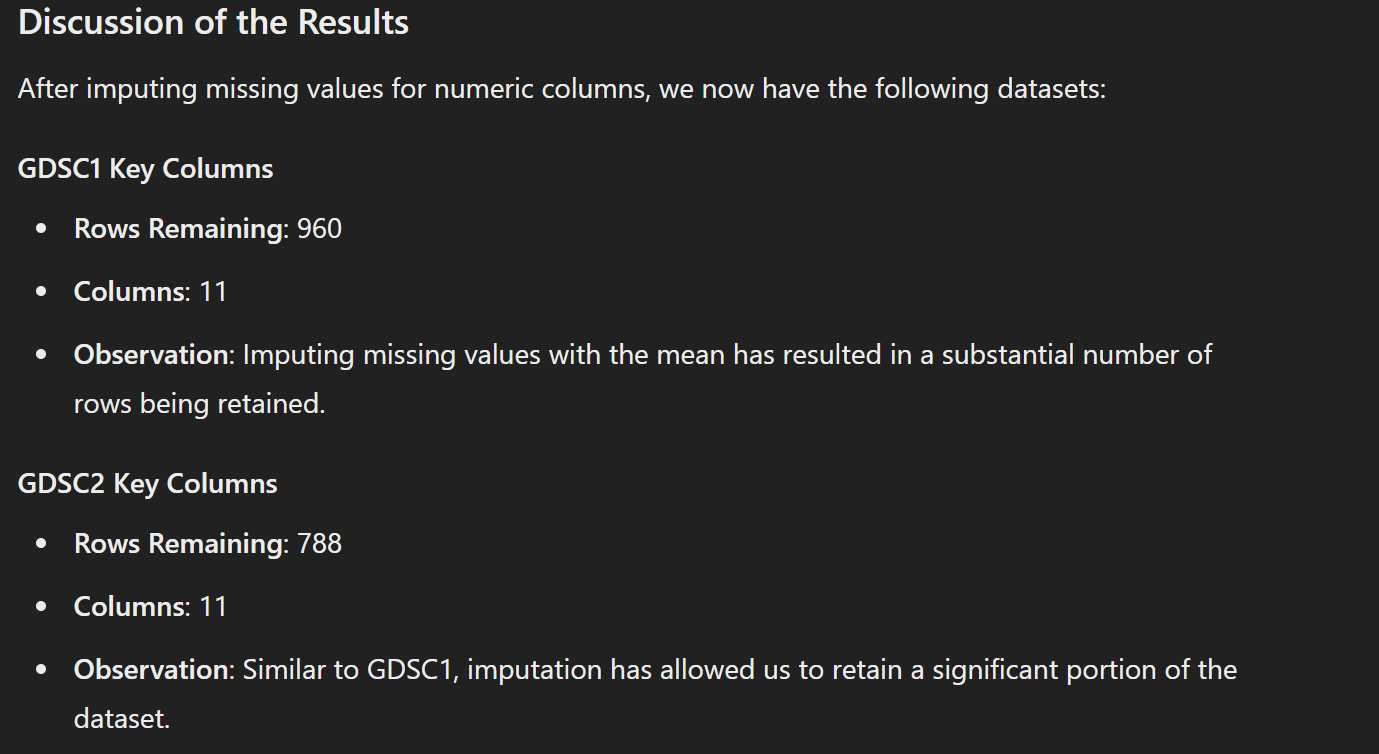

# **Normalization (Mapping)**

In [ ]:



from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize numeric columns in each dataset (excluding COSMIC_ID and other non-numeric columns)
def normalize_data(df):
    numeric_columns = df.select_dtypes(include=[float, int]).columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

# Normalize the datasets
sanger_key_columns_normalized = normalize_data(sanger_key_columns_clean)
gds1_key_columns_normalized = normalize_data(gdsc1_key_columns_imputed)
gds2_key_columns_normalized = normalize_data(gdsc2_key_columns_imputed)
prism_key_columns_normalized = normalize_data(prism_key_columns_clean)


<ipython-input-54-949957d74f56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
<ipython-input-54-949957d74f56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
<ipython-input-54-949957d74f56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

# **Encoding Categorical Variables Using One-Hot Encoding**

In [ ]:
# One-hot encode DRUG_NAME in the Sanger dataset
sanger_key_columns_encoded = pd.get_dummies(sanger_key_columns_normalized, columns=['DRUG_NAME'], dummy_na=True)
print("Sanger Key Columns (after encoding)")
print(sanger_key_columns_encoded.head())



Sanger Key Columns (after encoding)
                 COSMIC_ID  IC50_PUBLISHED  MAX_CONC  MIN_CONC  log2.ic50  \
12   0.0037370572527295476        0.000006  0.000498  0.000499   0.390012   
45     0.06315753314446157        0.000021  0.000498  0.000499   0.443386   
124    0.20175408463792854        0.000014  0.000498  0.000499   0.508754   
303     0.2374676600814668        0.000010  0.000498  0.000499   0.431253   
357     0.5606770094140576        0.000042  0.000498  0.000499   0.501884   

     DRUG_NAME_(5Z)-7-OXOZEAENOL  DRUG_NAME_5-FLUOROURACIL  DRUG_NAME_681640  \
12                         False                     False             False   
45                         False                     False             False   
124                        False                     False             False   
303                        False                     False             False   
357                        False                     False             False   

     DRUG_NAME_A-443

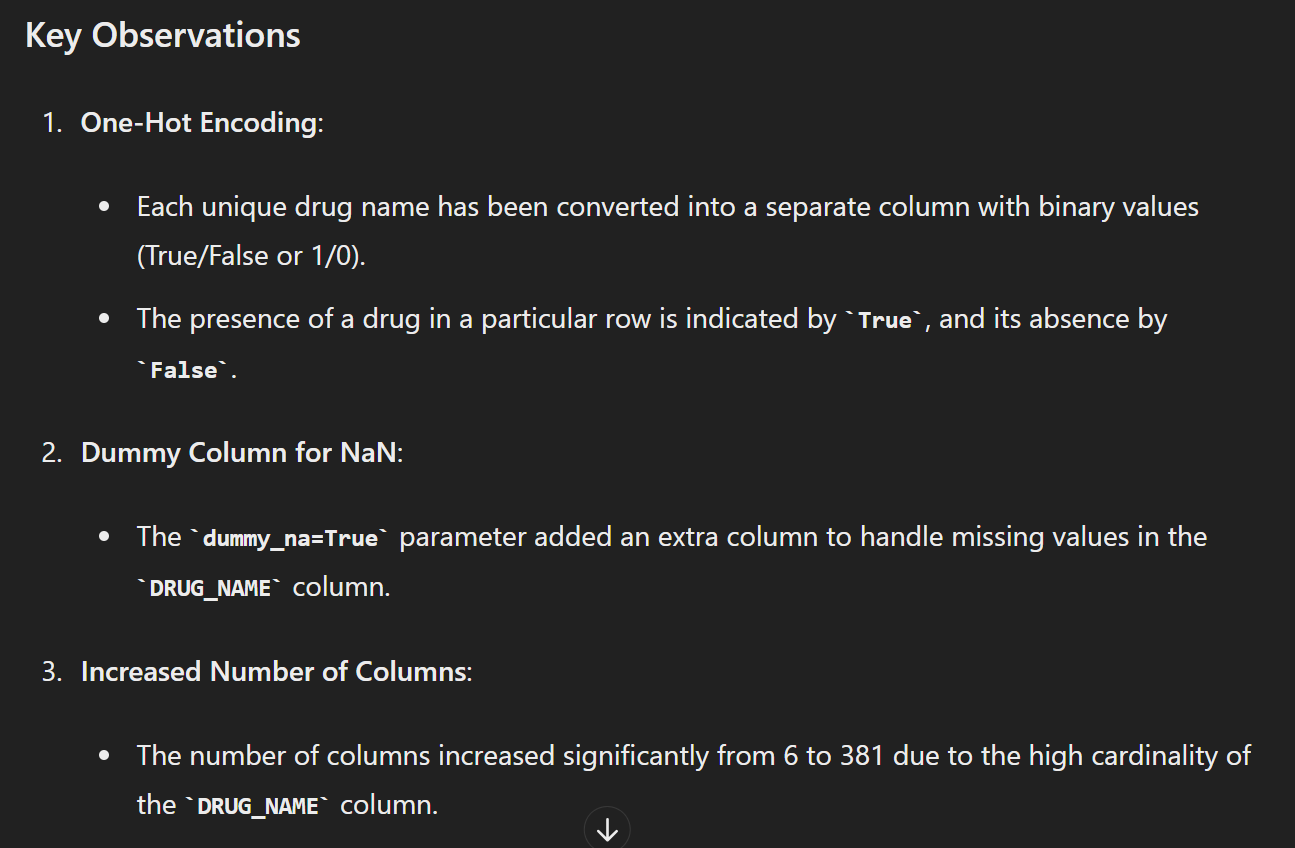

In [ ]:
# Convert COSMIC_ID columns to strings in all relevant DataFrames
sanger_key_columns_encoded['COSMIC_ID'] = sanger_key_columns_encoded['COSMIC_ID'].astype(str)
gds1_key_columns_normalized['COSMIC_ID'] = gds1_key_columns_normalized['COSMIC_ID'].astype(str)
gds2_key_columns_normalized['COSMIC_ID'] = gds2_key_columns_normalized['COSMIC_ID'].astype(str)
prism_key_columns_normalized['COSMIC_ID'] = prism_key_columns_normalized['COSMIC_ID'].astype(str)


<ipython-input-56-04977869c66c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gds1_key_columns_normalized['COSMIC_ID'] = gds1_key_columns_normalized['COSMIC_ID'].astype(str)
<ipython-input-56-04977869c66c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gds2_key_columns_normalized['COSMIC_ID'] = gds2_key_columns_normalized['COSMIC_ID'].astype(str)
<ipython-input-56-04977869c66c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
# Display the first few rows of the sanger_key_columns_normalized DataFrame
print("sanger_key_columns_normalized Sample:")
print(sanger_key_columns_normalized.head())

# Verify the data type of the COSMIC_ID column
print("\nsanger_key_columns_normalized COSMIC_ID type:")
print(sanger_key_columns_normalized['COSMIC_ID'].dtype)

# Check for any missing values in the COSMIC_ID column
print("\nNumber of missing values in COSMIC_ID column:")
print(sanger_key_columns_normalized['COSMIC_ID'].isnull().sum())


sanger_key_columns_normalized Sample:
     COSMIC_ID  DRUG_NAME  IC50_PUBLISHED  MAX_CONC  MIN_CONC  log2.ic50
12    0.003737  ERLOTINIB        0.000006  0.000498  0.000499   0.390012
45    0.063158  ERLOTINIB        0.000021  0.000498  0.000499   0.443386
124   0.201754  ERLOTINIB        0.000014  0.000498  0.000499   0.508754
303   0.237468  ERLOTINIB        0.000010  0.000498  0.000499   0.431253
357   0.560677  ERLOTINIB        0.000042  0.000498  0.000499   0.501884

sanger_key_columns_normalized COSMIC_ID type:
float64

Number of missing values in COSMIC_ID column:
0


In [ ]:
from sklearn.decomposition import PCA

# Define the number of principal components
n_components = 10

# Separate the features and target
sanger_features = sanger_key_columns_encoded.drop(columns=['COSMIC_ID'])
sanger_cosmic_id = sanger_key_columns_encoded['COSMIC_ID']

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=n_components)
sanger_pca = pca.fit_transform(sanger_features)

# Create a new DataFrame with the reduced features and COSMIC_ID
sanger_pca_df = pd.DataFrame(sanger_pca, columns=[f'PC{i+1}' for i in range(n_components)])
sanger_pca_df['COSMIC_ID'] = sanger_cosmic_id.values

# Display the shape and first few rows of the reduced dataset
print("Sanger Dataset after PCA:")
print(sanger_pca_df.shape)
print(sanger_pca_df.head())


Sanger Dataset after PCA:
(99800, 11)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.091101  0.092465 -0.003969 -0.002140 -0.007415 -0.002432 -0.004991   
1 -0.065329  0.054483 -0.005193 -0.004103 -0.004323 -0.005467 -0.006020   
2 -0.033769  0.007965 -0.006692 -0.006507 -0.000536 -0.009185 -0.007280   
3 -0.071188  0.063116 -0.004915 -0.003657 -0.005026 -0.004777 -0.005786   
4 -0.037084  0.012855 -0.006534 -0.006254 -0.000934 -0.008794 -0.007148   

        PC8       PC9      PC10              COSMIC_ID  
0 -0.003356 -0.003741 -0.003123  0.0037370572527295476  
1 -0.002892 -0.002457 -0.002763    0.06315753314446157  
2 -0.002325 -0.000885 -0.002323    0.20175408463792854  
3 -0.002998 -0.002749 -0.002845     0.2374676600814668  
4 -0.002384 -0.001050 -0.002369     0.5606770094140576  


In [ ]:
# Identify common COSMIC_ID values across GDSC1, GDSC2, and PRISM datasets
common_cosmic_ids = set(gdsc1_key_columns_normalized['COSMIC_ID']).intersection(
    gdsc2_key_columns_normalized['COSMIC_ID'], prism_key_columns_normalized['COSMIC_ID'])

# Ensure the type of COSMIC_ID in the Sanger dataset is string
sanger_pca_df['COSMIC_ID'] = sanger_pca_df['COSMIC_ID'].astype(str)
common_cosmic_ids = common_cosmic_ids.intersection(sanger_pca_df['COSMIC_ID'])

print("Number of common COSMIC_ID values:", len(common_cosmic_ids))
print("Sample of common COSMIC_ID values:", list(common_cosmic_ids)[:10])


Number of common COSMIC_ID values: 0
Sample of common COSMIC_ID values: []


In [ ]:
# Check the number of common COSMIC_ID values
common_cosmic_ids = set(gdsc1_key_columns_normalized['COSMIC_ID']).intersection(
    gdsc2_key_columns_normalized['COSMIC_ID'], prism_key_columns_normalized['COSMIC_ID'])

print("Number of common COSMIC_ID values:", len(common_cosmic_ids))


Number of common COSMIC_ID values: 456


In [ ]:
# Verify the common_cosmic_ids
print("Common COSMIC_ID values:", common_cosmic_ids)



Common COSMIC_ID values: {'ACH-001345', 'ACH-000971', 'ACH-000699', 'ACH-000873', 'ACH-000264', 'ACH-000053', 'ACH-000859', 'ACH-000569', 'ACH-000138', 'ACH-000815', 'ACH-000841', 'ACH-000098', 'ACH-000586', 'ACH-000717', 'ACH-000107', 'ACH-001653', 'ACH-000528', 'ACH-000678', 'ACH-000383', 'ACH-000139', 'ACH-000073', 'ACH-000679', 'ACH-000795', 'ACH-000137', 'ACH-000355', 'ACH-000301', 'ACH-000939', 'ACH-000849', 'ACH-000943', 'ACH-001650', 'ACH-000281', 'ACH-000319', 'ACH-000508', 'ACH-000945', 'ACH-000381', 'ACH-000189', 'ACH-000756', 'ACH-001500', 'ACH-000475', 'ACH-000651', 'ACH-000145', 'ACH-000878', 'ACH-000437', 'ACH-000900', 'ACH-000665', 'ACH-000332', 'ACH-000918', 'ACH-001193', 'ACH-000853', 'ACH-000094', 'ACH-000030', 'ACH-000373', 'ACH-000403', 'ACH-000222', 'ACH-000527', 'ACH-000065', 'ACH-001368', 'ACH-000751', 'ACH-000493', 'ACH-000938', 'ACH-000940', 'ACH-000607', 'ACH-000835', 'ACH-000759', 'ACH-000129', 'ACH-000911', 'ACH-000217', 'ACH-000108', 'ACH-000626', 'ACH-000

In [ ]:
# Check the data types of COSMIC_ID columns
print("Sanger COSMIC_ID type:", sanger_pca_df['COSMIC_ID'].dtype)
print("GDSC1 COSMIC_ID type:", gdsc1_key_columns_normalized['COSMIC_ID'].dtype)
print("GDSC2 COSMIC_ID type:", gdsc2_key_columns_normalized['COSMIC_ID'].dtype)
print("PRISM COSMIC_ID type:", prism_key_columns_normalized['COSMIC_ID'].dtype)


Sanger COSMIC_ID type: object
GDSC1 COSMIC_ID type: object
GDSC2 COSMIC_ID type: object
PRISM COSMIC_ID type: object


In [ ]:
# Strip whitespace from COSMIC_ID columns in all datasets
sanger_pca_df['COSMIC_ID']


0        0.0037370572527295476
1          0.06315753314446157
2          0.20175408463792854
3           0.2374676600814668
4           0.5606770094140576
                 ...          
99795      0.20290485238895048
99796      0.20174956473317196
99797      0.20094773362935697
99798      0.21735408391474376
99799       0.2017658363902956
Name: COSMIC_ID, Length: 99800, dtype: object

In [ ]:
# Correctly filter the Sanger dataset
sanger_filtered = sanger_pca_df[sanger_pca_df['COSMIC_ID'].isin(common_cosmic_ids)]

# Check the shape of the filtered Sanger dataset
print("Sanger Filtered Shape:", sanger_filtered.shape)

# Display sample rows from the filtered Sanger dataset
print("\nSanger Filtered Sample:")
print(sanger_filtered.head())


Sanger Filtered Shape: (0, 11)

Sanger Filtered Sample:
Empty DataFrame
Columns: [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, COSMIC_ID]
Index: []


In [ ]:
# Display unique COSMIC_ID values in sanger_pca_df to check for formatting issues
print(sanger_pca_df['COSMIC_ID'].unique())

# Check the first few rows of the sanger_pca_df
print(sanger_pca_df.head())

# Compare with common_cosmic_ids
print("Sample of common_cosmic_ids:", list(common_cosmic_ids)[:10])


[3.73705725e-03 6.31575331e-02 2.01754085e-01 2.37467660e-01
 5.60677009e-01 5.85210148e-01 4.02813912e-03 6.32325636e-02
 2.01676342e-01 2.01737813e-01 2.02612867e-01 2.03923639e-01
 2.04965025e-01 2.05095198e-01 2.05230795e-01 2.05447751e-01
 5.03066303e-01 5.82263171e-01 5.85133310e-01 5.85209244e-01
 5.85211956e-01 3.67920247e-04 3.52823765e-03 3.99649979e-03
 6.31584371e-02 6.31593411e-02 6.31729008e-02 6.31819406e-02
 6.31828446e-02 6.31873645e-02 6.31991163e-02 6.32054441e-02
 6.32126760e-02 6.32144839e-02 6.32153879e-02 6.32162919e-02
 6.32397954e-02 6.32406994e-02 2.00932366e-01 2.00943214e-01
 2.00948638e-01 2.00954965e-01 2.00961293e-01 2.00965813e-01
 2.00966717e-01 2.00968525e-01 2.00972141e-01 2.00973949e-01
 2.00976661e-01 2.01709790e-01 2.01742333e-01 2.01747757e-01
 2.01764932e-01 2.01765836e-01 2.01929457e-01 2.01941209e-01
 2.01951152e-01 2.01956576e-01 2.02046070e-01 2.02048782e-01
 2.02136469e-01 2.02137373e-01 2.02138277e-01 2.02143700e-01
 2.02144604e-01 2.021527